# Project 1: Somm One Hold My Wine
## Jack Weissenberger

These are the imports that are needed for this assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here we read in the csv file for the wine data set and look at the head of the data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/wine/wine.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.iloc[0:130,0]

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
100    2
101    2
102    2
103    2
104    2
105    2
106    2
107    2
108    2
109    2
110    2
111    2
112    2
113    2
114    2
115    2
116    2
117    2
118    2
119    2
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
Name: 0, Length: 130, dtype: int64

Then I extract the X values which are columns 1 and 10 and then the classes y wchich is column 0. Also only the first 130 values are used so that there are only two distinct types Then I use the .values function to convert the data frames into lists

In [4]:
y = df.iloc[0:130,0].values
X = pd.concat([df.iloc[0:130,1],df.iloc[0:130,10]], axis = 1).values

## Perceptron
This is the perceptron model from the code from Python Machine Learning Second Edition, I have editied the fit() method to end training once the error reaches a certain threshold. Unfortunately this model does not fit the data very well so that threshold is almost never met but it can be adjusted to see how it would work. 

In [5]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        
        """
        * This is the new code to end the training after the error reaches a certain threshold.
        * I have used a while loop to say that if the model gets less than 50 wrong (errors > 50)
        * then the training will terminate. Unfortunately this model is not very good so the number
        * of correct prediction only improves by one over the course of training so I added another
        * condition to the wile loop that makes it terminate after the designated amount of loops. 
        *
        * NOTE: If you would like to see the training stop because of the error threshold, set the
        * error bound to be 72 and then it will likely stop after one or two iterations once it 
        * goes from 72 incorrect predicitons to 71 
        """
        i = 0
        errors = 1000
        while i < self.n_iter and errors > 50:
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)           
            self.errors_.append(errors)
            i += 1
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)



Text(0,0.5,'Number of updates')

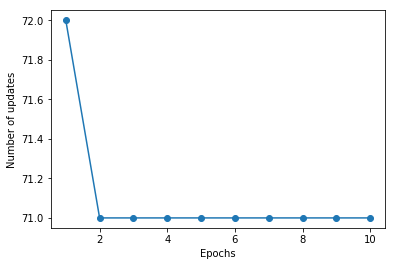

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

## Adaline
This is the Adaline gradient descent code from Python Machine Learning Second Edition. I have edited the fit method to end training once the sum of squared error reaches 57. We can see that this works because the tranining ends after nine iterations instead of the 30 iterations it was supposed to run for. 

In [7]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        """
        * This is the modified loop I edited for ending training based on an error threshold.
        * Training in this model ends when the squared error reaches 24. This is actually a 
        * much better model than the perceptron as you can see the squared error go down over 
        * the course of training. You can also see the training stop because of the error 
        * threshold as the training was supposed to last for 30 iterations but ends after 
        * only 14 iterations.
        """
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            # These are the two lines of code I added to end training
            # based on an error threshold
            if cost < 24:
                return self
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


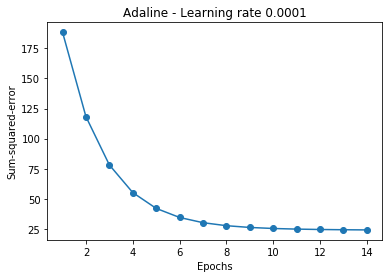

In [8]:
ada = AdalineGD(n_iter=30, eta=0.00001).fit(X, y)
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')

plt.show()